# Reddit Comment Scraper

The first two cells import a python library to talk to reddit and create an instance of the 'scraper'

In [8]:
import praw
from wordcloud import WordCloud


In [9]:
r = praw.Reddit('comment scraper') 

The next cell is the ID of the post you want to scrape comments from. Go to any reddit post and copy your own ID in to here: Example https://www.reddit.com/r/SquaredCircle/comments/2coe77/creating_a_map_of_wrestlers_linked_by_the_stables/

In [10]:
id = '2coe77'

The following code grabs the comments on the web

In [11]:
submission = r.get_submission(submission_id=id)
forest_comments = submission.comments
flat_comments = praw.helpers.flatten_tree(submission.comments)


This phase takes the comments and puts them in a CSV on the server. You can download this by going back to the main page and downloading the new file that appears after you have ran this code.

If you remove the hash in the next line then it will print results

In [12]:
myfile = open("redditcomments.txt", "wb")
for comment in flat_comments:
    author = unicode(comment.author)
    body = unicode(comment.body)
    
    author = author.encode("utf-8")
    body = body.encode("utf-8")
    
    myfile.write(author + " ; " + body )
    myfile.write("\n")
    
    #print(author, " ; ", body )
myfile.close()

This reads your comments into a wordcloud object

In [13]:
text = open('redditcomments.txt').read()
wordcloud = WordCloud().generate(text)

finally we can plot it:

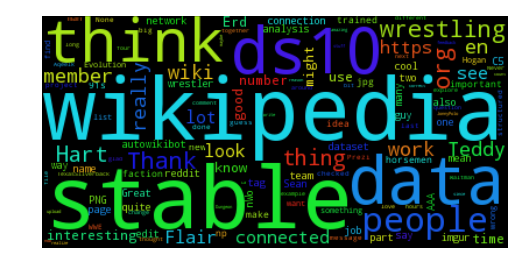

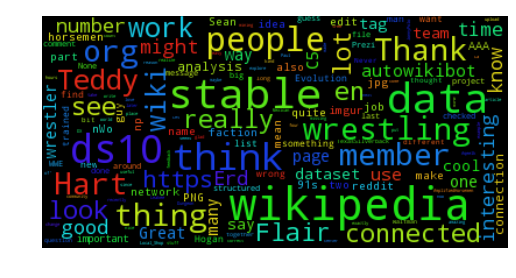

In [14]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()